<a href="https://colab.research.google.com/github/Lakeshprabhu/Deep-Learning/blob/Basics/SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=ba5dc6696f313bf71bc9d587c7a4d7424ffe1d15f2ec3ac354e1f14cf4324d4b
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


In [5]:
df = pd.read_csv("Credit_Card_Applications.csv")
df

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
x = df.drop('Class',axis=1).values
y = df['Class'].values





In [22]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))

x = sc.fit_transform(x)

In [23]:
from minisom import MiniSom

som = MiniSom(x=10,y=10,sigma=1.0,input_len=15,learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

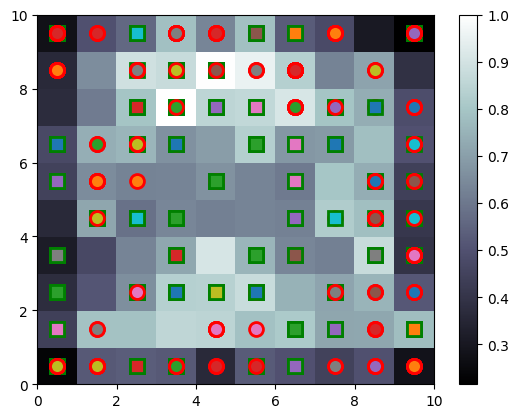

In [24]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']

for i,xo in enumerate(x):
  winner = som.winner(xo)
  plot(winner[0]+0.5,winner[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor=None,markersize = 10,markeredgewidth=2)


show()

In [27]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(3,7)],mappings[(4,8)]),axis=0)
frauds = sc.inverse_transform(frauds)
frauds


array([[1.5636521e+07, 0.0000000e+00, 2.3500000e+01, 9.0000000e+00,
        2.0000000e+00, 1.1000000e+01, 4.0000000e+00, 8.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.2000000e+02, 1.0000000e+00],
       [1.5567834e+07, 0.0000000e+00, 3.0000000e+01, 5.2900000e+00,
        2.0000000e+00, 1.0000000e+01, 2.0000000e+00, 2.2500000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 9.9000000e+01, 5.0100000e+02],
       [1.5591035e+07, 0.0000000e+00, 1.8830000e+01, 9.5000000e+00,
        2.0000000e+00, 9.0000000e+00, 4.0000000e+00, 1.6250000e+00,
        1.0000000e+00, 1.0000000e+00, 6.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 4.0000000e+01, 6.0100000e+02],
       [1.5608804e+07, 0.0000000e+00, 2.8670000e+01, 1.0400000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.5000000e+00,
        1.0000000e+00, 1.0000000e+00, 5.0000000e+00, 1.0000000e+00,
        2.0000000e+00,